### Exercise
Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.

Measure prediction score using default n_estimators (10)
Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees

In [1]:
import pandas as pd 
import numpy as np 
import joblib 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
%matplotlib notebook 
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris 
from sklearn.metrics import confusion_matrix
from seaborn import heatmap


In [2]:
iris=load_iris()


In [3]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.filename

'C:\\Users\\Mohamed\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv'

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
flower=pd.DataFrame(iris.data , columns=iris.feature_names)
flower.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
flower["target"]=iris.target

In [12]:
flower

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
flower["name_flower"]=flower.target.apply(lambda x: iris.target_names[x])
flower.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name_flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [14]:
setosa=flower[flower["target"]==0]
versicolor=flower[flower["target"]==1]
virginica=flower[flower["target"]==2]

<IPython.core.display.Javascript object>


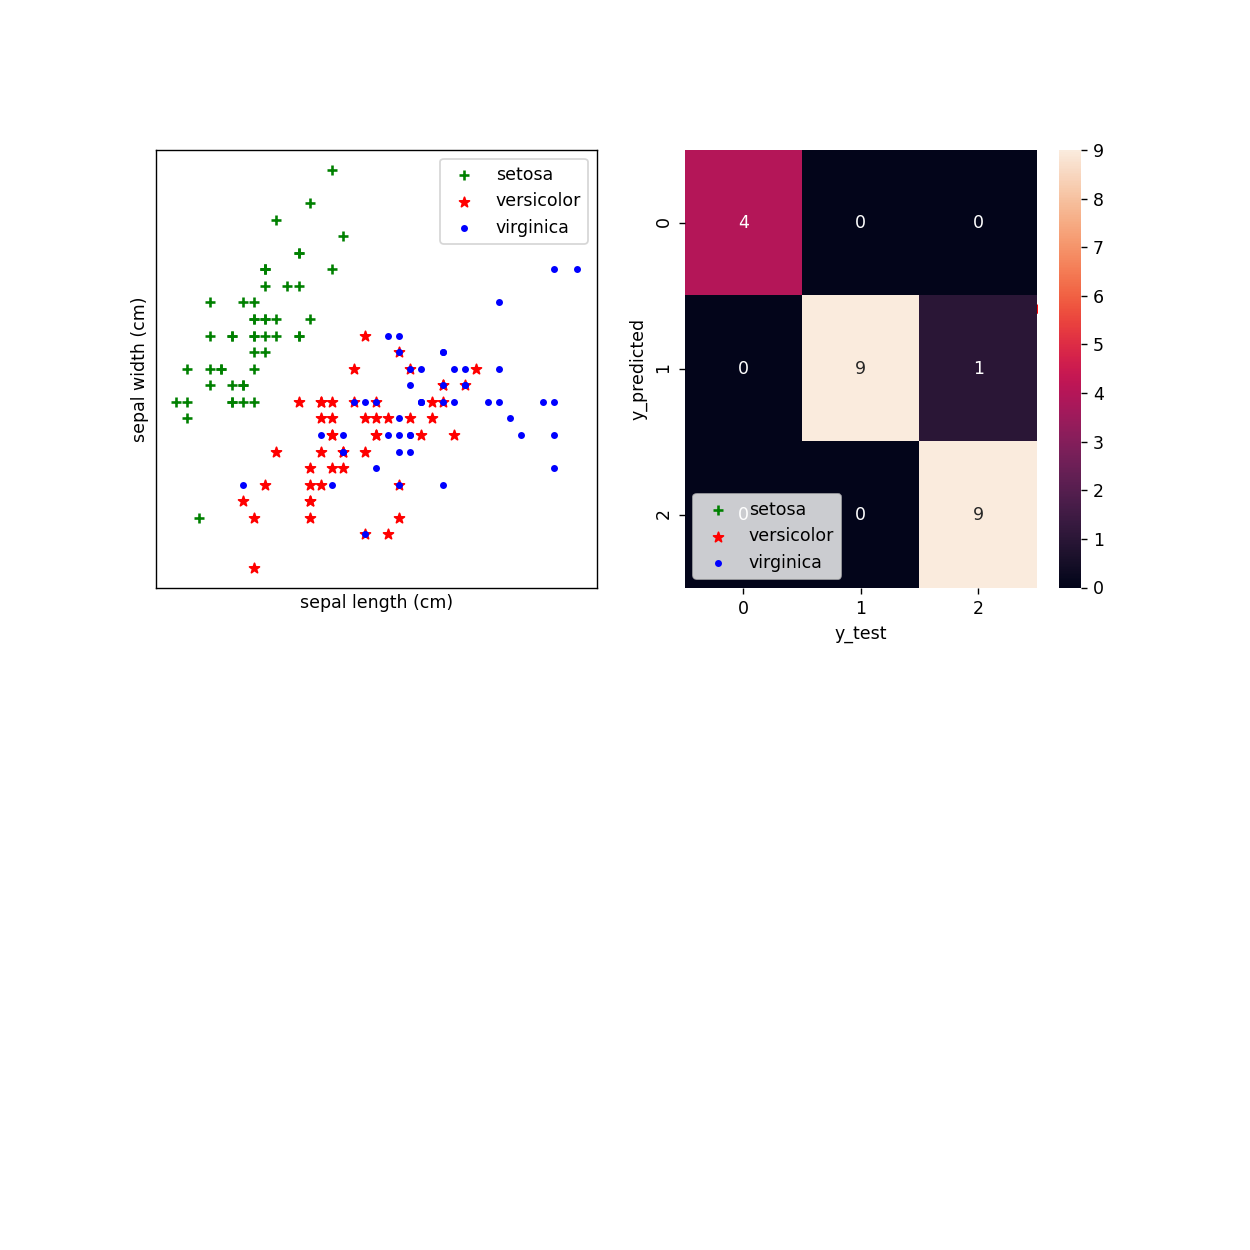

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1),
plt.scatter(setosa["sepal length (cm)"],setosa["sepal width (cm)"],c="g",marker="+",label="setosa")
plt.scatter(versicolor["sepal length (cm)"],versicolor["sepal width (cm)"],c="red",marker="*",label="versicolor" )
plt.scatter(virginica["sepal length (cm)"], virginica["sepal width (cm)"],c="blue",marker=".", label="virginica")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.xticks([])
plt.yticks([])
plt.legend(loc="best")
plt.show()


plt.subplot(2,2,2),
plt.scatter(setosa["petal length (cm)"],setosa["petal width (cm)"],c="g",marker="+",label="setosa")
plt.scatter(versicolor["petal length (cm)"],versicolor["petal width (cm)"],c="red",marker="*",label="versicolor" )
plt.scatter(virginica["petal length (cm)"], virginica["petal width (cm)"],c="blue",marker=".", label="virginica")
plt.xlabel("petal length (cm)")
plt.ylabel("sepal width (cm)")
plt.xticks([])
plt.yticks([])
plt.legend(loc="best")
plt.show()


In [16]:
x=flower.drop(["target","name_flower"] , axis= 1)
y=flower.target

In [17]:
x_train ,x_test ,y_train ,y_test =train_test_split(x,y ,test_size= 0.15 )

In [18]:
model=RandomForestClassifier(n_estimators= 1000)
model.fit(x_train ,y_train)


RandomForestClassifier(n_estimators=1000)

In [19]:
model.score(x_train,y_train)

1.0

In [20]:
model.score(x_test,y_test)

0.9565217391304348

In [21]:
joblib.dump(model , "flowers")

['flowers']

In [22]:
model.feature_importances_

array([0.10073328, 0.02192513, 0.41043765, 0.46690394])

In [23]:
y_predicted= model.predict(x_test)

In [24]:
cmp=confusion_matrix(y_test ,y_predicted )

In [25]:
heatmap(cmp , annot=True)
plt.xlabel("y_test")
plt.ylabel("y_predicted")
plt.show()